### Name : Neeharika Ramanujula

# LGM VIP Task 1 : The Iris Flower classification ML project 


## Aim : To identify different species Iris-setosa, Iris-versicolor, Iris-virginica  from the given dataset

### Importing Modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset using pandas

In [36]:
df = pd.read_csv("C:/Users/lenovo/Documents/ds_intern/iris.csv",index_col='Id')
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  I

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df['Species'].value_counts()
#iris is a balanced dataset as the no.of data points foe every class is same. 

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualisation

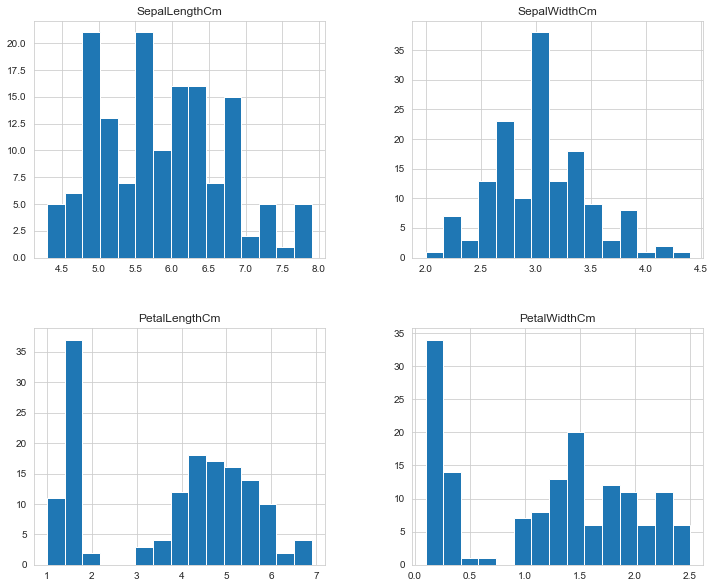

In [37]:
df.hist(figsize=(12,10),bins = 15)
plt.show()

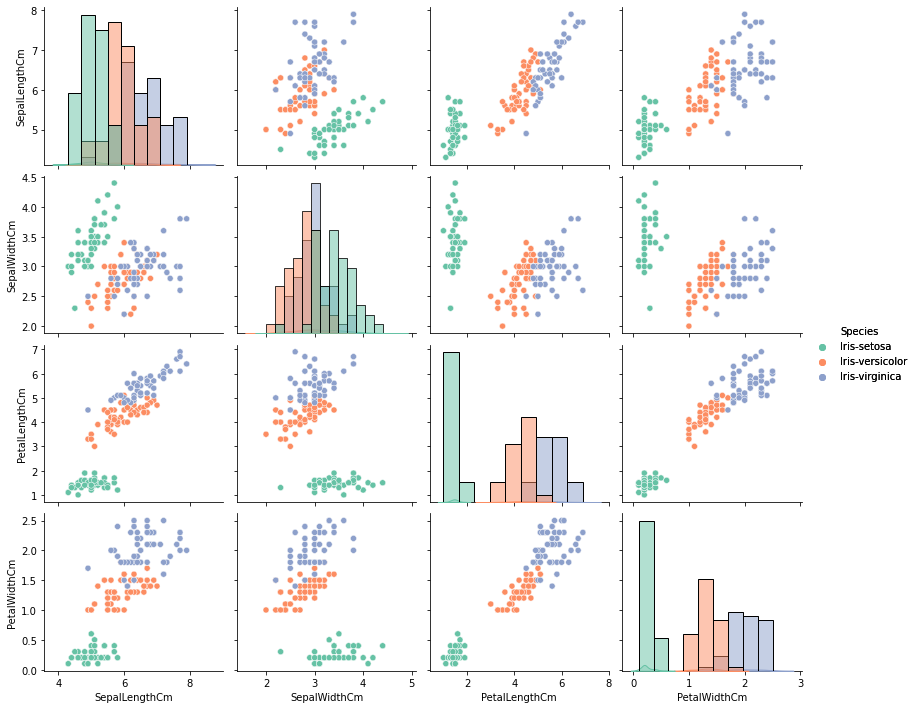

In [10]:
p=sns.pairplot(df, hue = 'Species', palette="Set2")
p.map_diag(sns.histplot)
p.map_offdiag(sns.scatterplot)
p.add_legend()

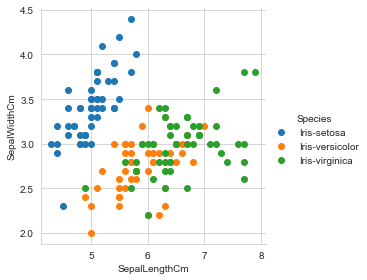

In [11]:
#2-D scatter plot with different color for each flower type
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species",height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();


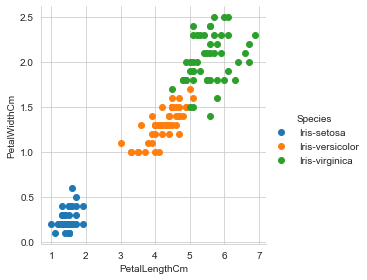

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species",height=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();
plt.show();

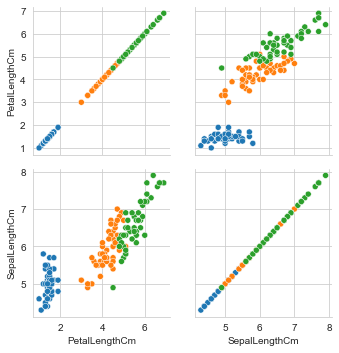

In [13]:
p = sns.PairGrid(df, vars=["PetalLengthCm", "SepalLengthCm"], hue="Species")
p.map(sns.scatterplot)

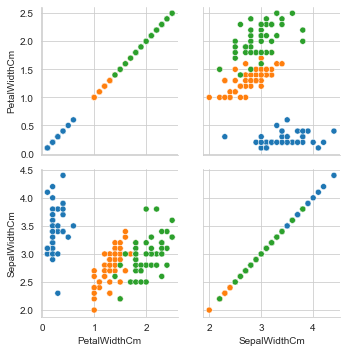

In [14]:
p = sns.PairGrid(df, vars=["PetalWidthCm", "SepalWidthCm"], hue="Species")
p.map(sns.scatterplot)

### Correlation matrix

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


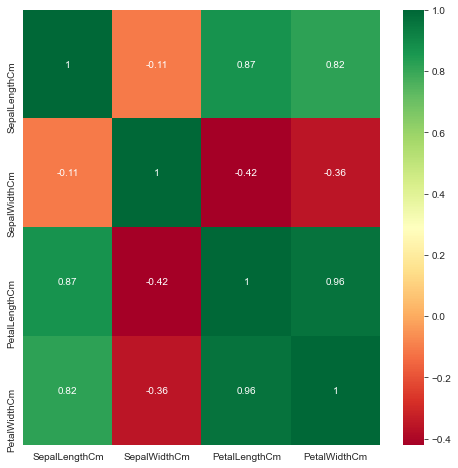

In [16]:
plt.figure(figsize=(8,8))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

# The SepalWidthCm feature seems to be less relevant in explaining the species as compared to the other features.

### Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

x = df.loc[:, features].values
y = df.loc[:,['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Splitting data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40) 

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [30]:
#model training
log_reg.fit(x_train, y_train)

LogisticRegression()

In [31]:
#accuracy
print("Accuracy: ")
log_reg.score(x_test, y_test)

Accuracy: 


0.95

In [32]:
log_reg.score(x, y)

0.9733333333333334

### KNN  k-nearest neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()

In [34]:
knnmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
print("Accuracy: ")
knnmodel.score(x_test, y_test)* 100

Accuracy: 


98.33333333333333